# Time Series Modeling Part2
- reference:
  - Autoregressive Moving Average ARMA(p, q) Models for Time Series Analysis - Part 3.https://www.quantstart.com/articles/Autoregressive-Moving-Average-ARMA-p-q-Models-for-Time-Series-Analysis-Part-3/
  - 🌟Time Series: Autoregressive models AR, MA, ARMA, ARIMA. https://people.cs.pitt.edu/~milos/courses/cs3750/lectures/class16.pdf

## Modeling Time Series with ARIMA Class Models

### Autoregressive Model(AR(q))
- Intuition: a regression of variable against previous realization and white noise with linear combination  
- Model: $y_t=c+Φ_1y_{t-1}+\phi_2y_{t-2}+...+Φ_py_{t-p}+ϵ_t$
  - $ϵ_t$: white noise ~$N(0,σ^2)$
    - only change the <u>scale</u> of series, but not change the patterns.
  - $p$: order
  - $Φ$: model coefficients
  - $y_{t-p}$: past series values(lags)
  - $c=(1-\sum_{i=1}^p\phi_i)μ$, where $μ$: process mean
- In financial area, the autoregressive model tries to account for `momentum` and `mean reversion` effect.
- For $p=1$ AR:
  - if $Φ_1=0$, $y_t$, model is equivalent to white noise.
  - if $Φ_1=1$, $c=0$, model is equivalent to a random walk.
  - if $Φ_1=1$, $c≠0$, model is equivalent to a random walk with drift.
  - range of $Φ_1$: $(-1,1)$
- For $p=2$ AR:
  - range of $Φ_2$: $(-1,1)$
  - $Φ_1+Φ_2<-1$
### Moving Average Model(MA(q))
- Intuition: use past values forecast errors in regression
- Formula: $y_t=c+ϵ_t+\theta_1ϵ_{t-1}+\theta_2ϵ_{t-2}+...+\theta_qϵ_{t-q}$
  - $q$: order
  - $ϵ_t$: white noise, not observable, hence, it is not really a normal regression. ~$N(0,\sigma^2=1)$
- In financial area, MA tries to account for the <u>unpredictable shocks</u>.Eg: natrual disastors or break news.
### Autoregressive Moving Average(ARMA(p,q))
- Combine two linear regresssions together to make up a new linear regression model.
- Formula: $y_t=Φ_1y_{t-1}+\phi_2y_{t-2}+...+Φ_py_{t-p}+ϵ_t+\theta_1ϵ_{t-1}+\theta_2ϵ_{t-2}+...+\theta_qϵ_{t-q}$
### Autoregressive Integrated Moving Average(ARIMA(p,d,q))
#### Integrated(d): 
- Intuition: differencing original time series to make it stationary
- $d$:the number of times to apply differencing. Degree of differencing.
- the reverse of differencing
#### ARIMA
- Model: $ARIMA \space (p,d,q) \space (P,D,Q)m$  ->**SARIMA**
  - $(p,d,q)$: Non-seasonal part
  - $(P,D,Q)m$: Seasonal part of model
    - $m$: # of observations per year
- Non-seasonal model: $y_t'=c+Φ_1y'_{t-1}+\phi_2y'_{t-2}+...+Φ_py'_{t-p}+ϵ_t+\theta_1ϵ_{t-1}+\theta_2ϵ_{t-2}+...+\theta_qϵ_{t-q}$
  -  $y_t'$: differenced series
#### Transformation
- ARIMA (0,0,0): White noise
- ARIMA (0,1,0) without constant: Random walk model
- ARIMA (p,0,q): ARMA(p, q)
- ARIMA (p, 0, 0): AR(p) model
- ARIMA (0, 0, q): MA(q) model
- ARIMA (0,1,2): Damped Holt's model
- ARIMA (0,1,1) without constant: SES model
- ARIMA (0,2,2): Holt's linear method with additive errors
#### Evaluation
- Drawback: Inability to capture `volatility clustering` of financial assets
#### ARIMAX
- Adds `exogenous variable(s)` to the model.
- model: $y_t=\beta x_t+Φ_1y'_{t-1}+\phi_2y'_{t-2}+...+Φ_py'_{t-p}+ϵ_t+\theta_1ϵ_{t-1}+\theta_2ϵ_{t-2}+...+\theta_qϵ_{t-q}$
  - $x_t$: a **covariant** at time $t$, with the coefficient $\beta$

In this case, we use Google 2018~2022 weekly stock prices to model.


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
import scipy.stats as scs

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 15.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
import yfinance as yf

In [ ]:
#copy the code from part1
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tools.sm_exceptions import InterpolationWarning
import warnings

# settings 
warnings.filterwarnings('ignore', '.*output shape of zoom.*')
warnings.simplefilter(action='ignore', category=InterpolationWarning)
plt.style.use('seaborn')

def adf_test(x):
    '''
    Function for performing the Augmented Dickey-Fuller test for stationarity
    
    Null Hypothesis: time series is not stationary
    Alternate Hypothesis: time series is stationary

    Parameters
    ----------
    x : pd.Series / np.array
        The time series to be checked for stationarity
    
    Returns
    -------
    results: pd.DataFrame
        A DataFrame with the ADF test's results
    '''

    indices = ['Test Statistic', 'p-value', '# of Lags Used', '# of Observations Used']

    adf_test = adfuller(x, autolag='AIC')
    results = pd.Series(adf_test[0:4], index=indices)

    for key, value in adf_test[4].items():
        results[f'Critical Value ({key})'] = value

    return results


def kpss_test(x, h0_type='c'):
    '''
    Function for performing the Kwiatkowski-Phillips-Schmidt-Shin test for stationarity

    Null Hypothesis: time series is stationary
    Alternate Hypothesis: time series is not stationary

    Parameters
    ----------
    x: pd.Series / np.array
        The time series to be checked for stationarity
    h0_type: str{'c', 'ct'}
        Indicates the null hypothesis of the KPSS test:
            * 'c': The data is stationary around a constant(default)
            * 'ct': The data is stationary around a trend
    
    Returns
    -------
    results: pd.DataFrame
        A DataFrame with the KPSS test's results
    '''

    indices = ['Test Statistic', 'p-value', '# of Lags']

    kpss_test = kpss(x, regression=h0_type)
    results = pd.Series(kpss_test[0:3], index=indices)

    for key, value in kpss_test[3].items():
        results[f'Critical Value ({key})'] = value

    return results


def test_autocorrelation(x, n_lags=40, alpha=0.05, h0_type='c'):
    '''
    Function for testing the stationarity of a series by using:
    * the ADF test
    * the KPSS test
    * ACF/PACF plots

    Parameters
    ----------
    x: pd.Series / np.array
        The time series to be checked for stationarity
    n_lags : int
        The number of lags for the ACF/PACF plots
    alpha : float
        Significance level for the ACF/PACF plots
    h0_type: str{'c', 'ct'}
        Indicates the null hypothesis of the KPSS test:
            * 'c': The data is stationary around a constant(default)
            * 'ct': The data is stationary around a trend

    Returns
    -------
    fig : matplotlib.figure.Figure
        Figure containing the ACF/PACF plot
    '''

    adf_results = adf_test(x)
    kpss_results = kpss_test(x, h0_type=h0_type)

    print('ADF test statistic: {:.2f} (p-val: {:.2f})'.format(adf_results['Test Statistic'],adf_results['p-value']))
    print('KPSS test statistic: {:.2f} (p-val: {:.2f})'.format(kpss_results['Test Statistic'], kpss_results['p-value']))

    fig, ax = plt.subplots(2, figsize=(16, 8))
    plot_acf(x, ax=ax[0], lags=n_lags, alpha=alpha)
    plot_pacf(x, ax=ax[1], lags=n_lags, alpha=alpha)

    return fig

In [ ]:
#download data from yf and resample weekly
GOOG=yf.download('GOOG', start='2018-01-01',end='2022-12-31', progress=False)

In [ ]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,52.417000,53.347000,52.261501,53.250000,53.250000,24752000
2018-01-03,53.215500,54.314499,53.160500,54.124001,54.124001,28604000
2018-01-04,54.400002,54.678501,54.200100,54.320000,54.320000,20092000
2018-01-05,54.700001,55.212502,54.599998,55.111500,55.111500,25582000
2018-01-08,55.111500,55.563499,55.081001,55.347000,55.347000,20952000


In [ ]:
GOOG=GOOG.resample('W').last().rename(columns={'Adj Close': 'adj_close'}).adj_close 

In [ ]:
GOOG.head()

Date
2018-01-07    55.111500
2018-01-14    56.112999
2018-01-21    56.875500
2018-01-28    58.792000
2018-02-04    55.595001
Freq: W-SUN, Name: adj_close, dtype: float64

<AxesSubplot:title={'center':'First Differences'}, xlabel='Date'>

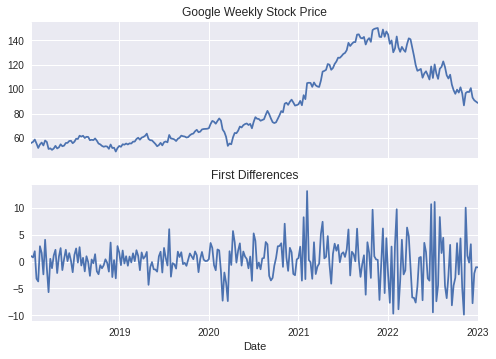

In [ ]:
#apply the first differences to weekly data
GOOGD = GOOG.diff().dropna()

fig, ax = plt.subplots(2, sharex=True)
GOOG.plot(title = "Google Weekly Stock Price", ax=ax[0])
GOOGD.plot(ax=ax[1], title='First Differences')

- The original weekly google stock price is non-stationary from the graph.

ADF test statistic: -8.62 (p-val: 0.00)
KPSS test statistic: 0.28 (p-val: 0.10)


/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


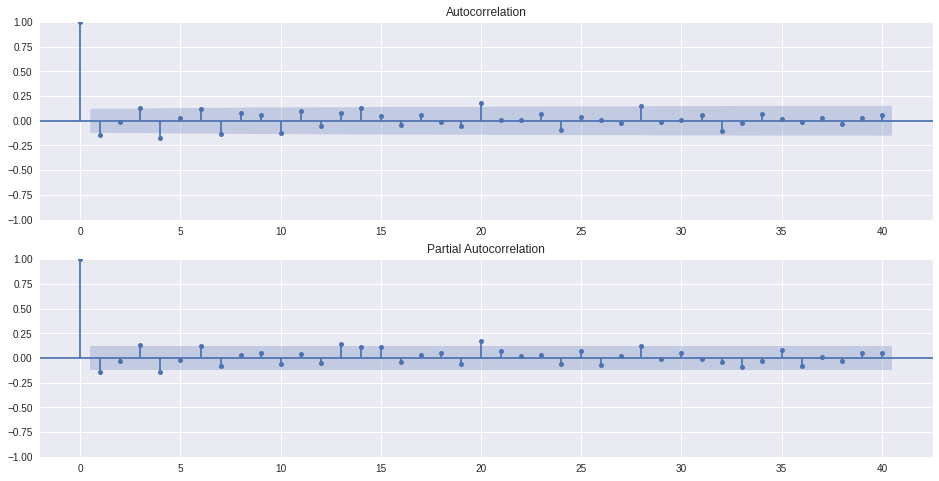

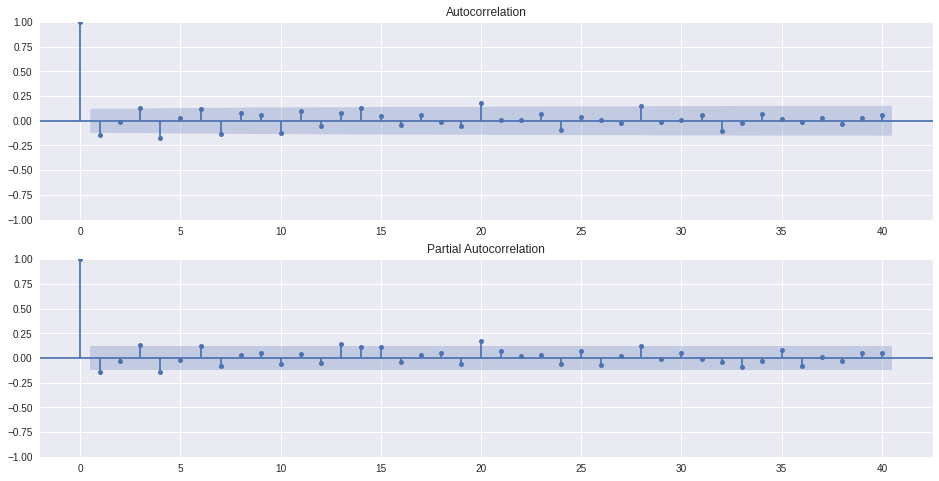

In [ ]:
# test the differenced series for stationary
test_autocorrelation(GOOGD)

- The results show that the differenced prices are **stationary**.

In [ ]:
#apply the ARIMA model
arima = sm.tsa.arima.ARIMA(GOOG, order=(2, 1, 1)) #set order, p=2,d=1,q=1
result=arima.fit()
result.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              adj_close   No. Observations:                  261
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -698.245
Date:                Sat, 04 Mar 2023   AIC                           1404.491
Time:                        04:40:21   BIC                           1418.733
Sample:                    01-07-2018   HQIC                          1410.216
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7980      0.276     -2.893      0.004      -1.339      -0.257
ar.L2         -0.1726      0.052     -3.297      0.001      -0.275      -0.070
ma.L1          0.6538      0.275      2.374      0.018       0.114       1.193
sigma2        12.5914      0.900     13.990      0.000      10.827      14.356
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                16.55
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               6.55   Skew:                             0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Ljung-Box Test
- Decide whether ARIMA model is a good fit of time series.
- Test a set of autocorrelations of fitted time series whether differ significantly from 0.
- Hypothesis:
  - $H_0$:the correlation between the population series=0, iid
  - $H_1$:the time series data at each lag are not iid, leading to non-zero serial correlation.
- Test statistic: $Q=n(n+2)\sum_{k=1}^h\frac{\hat{\rho_k^2}}{n-k}$ ~$\chi^2_{\alpha,df}$
  - $n$: length of time series sample
  - $\rho_k$: the sample autocorrelation at lag $k$
  - $h$: number of lags, <u>degree of freedom</u> of Chi-square test in this case
- Decision Rule:
  - if $Q>\chi^2_{\alpha,h}$, we have enough evidence to reject $H_0$.

#### Order Selection 
##### Akaike’s Information Criterion(AIC)
- goal: to decide order(especially for p and q) and to select predictors for regression
- model: $AIC=-2log(L)+2(p+q+k+1)$
  - L: log likelihood of data
  - k: binary indicator. if c=0, k=0; if c≠0, k=1
  - p+q+k+1:the number of parameters in the model
##### Correlated AICc
- Formula: $AICc=AIC+\frac{2(p+q+k+1)(p+q+k+2)}{T-p-q-k-2}$
##### Bayesian Information Criterion(BIC)
- Formula:$BIC=AIC+[log(T)-2](p+q+k+1)$

- the **smaller** AIC, AICc, BIC, the better models are.
- trade-off between the `goodness of fit` of the model and its `simplicity`


In [ ]:
import seaborn as sns

In [ ]:
#dignose the fit of the model based on the residual
def arima_dignostics(resids, n_lags=40):
  #subplot format design
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

  #calculate the residuals without missing value
  r=resids
  resids=(r-np.nanmean(r))/np.nanstd(r) #standardlize
  residsWOmissing=resids[~(np.isnan(resids))]

  #graph the standard residual over time 
  sns.lineplot(x=np.arange(len(resids)),y=resids, ax=ax1)
  ax1.set_title('Standard Residuals')

  #draw the residuals distribution
  x_lim =(-1.96 * 2, 1.96 * 2) #the range shown in x-axis
  r_range = np.linspace(x_lim[0], x_lim[1])
  normal_pdf = scs.norm.pdf(r_range)

  sns.distplot(residsWOmissing, hist=True, kde=True, norm_hist=True, ax=ax2) #plot the standard residual distribution
  ax2.plot(r_range, normal_pdf, 'g', lw=2, label='N(0,1)') #plot the standard normal distribution
  ax2.set_title('Distribution of Standardized Residuals')
  ax2.set_xlim(x_lim)
  ax2.legend()

  #Q-Q plot check the normalization
  QQ=sm.qqplot(residsWOmissing, line='s', ax=ax3)
  ax3.set_title('Q-Q plot')

  #ACF plot
  plot_acf(resids, ax=ax4, lags=n_lags, alpha=0.05) #use the function from statsmodels
  ax4.set_title('ACF plot')

  return fig 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


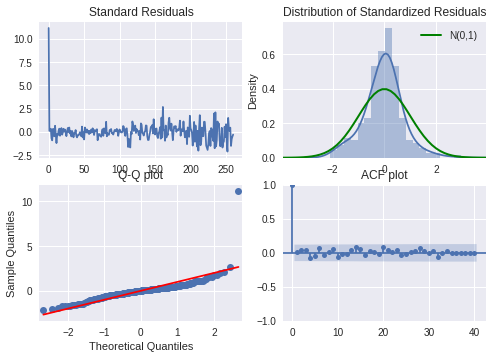

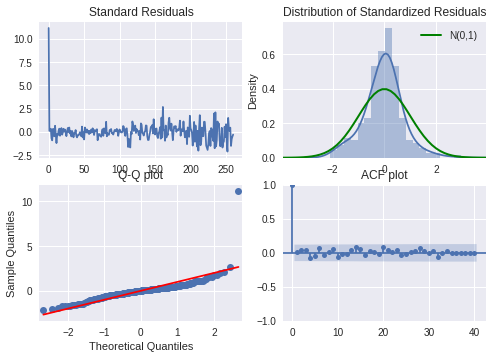

In [ ]:
#apply the function we writen above
arima_dignostics(result.resid, 40) 

- The average of standard residual values close to 0 except the early beginning period.
- the ACF plot shows the points almost lie in the confidence interval, meaning that the residuals are not correlated.
- While, from the Q-Q plot, the tail is higher than that of normal distribution.

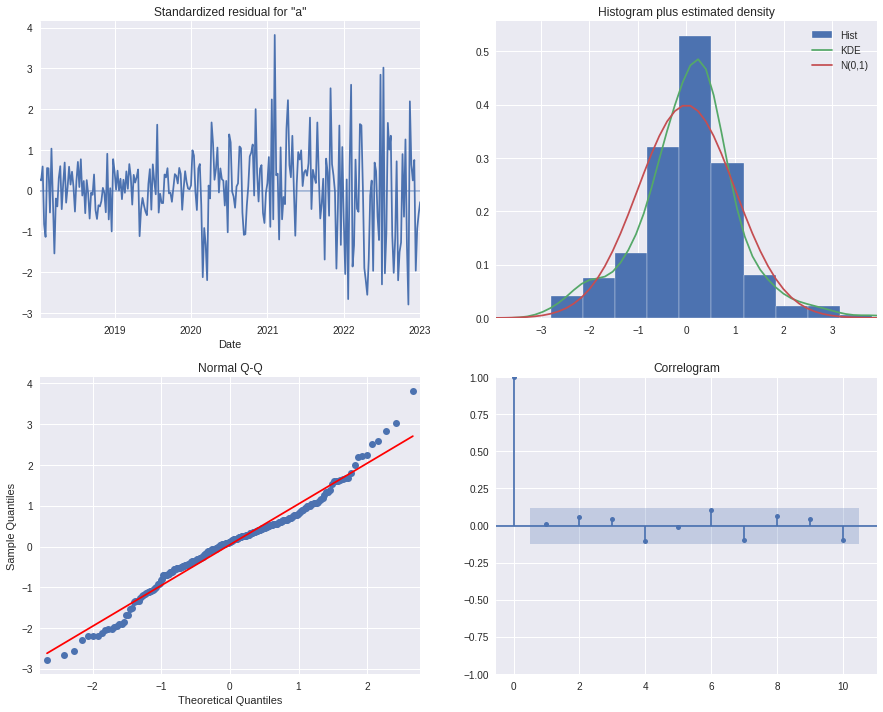

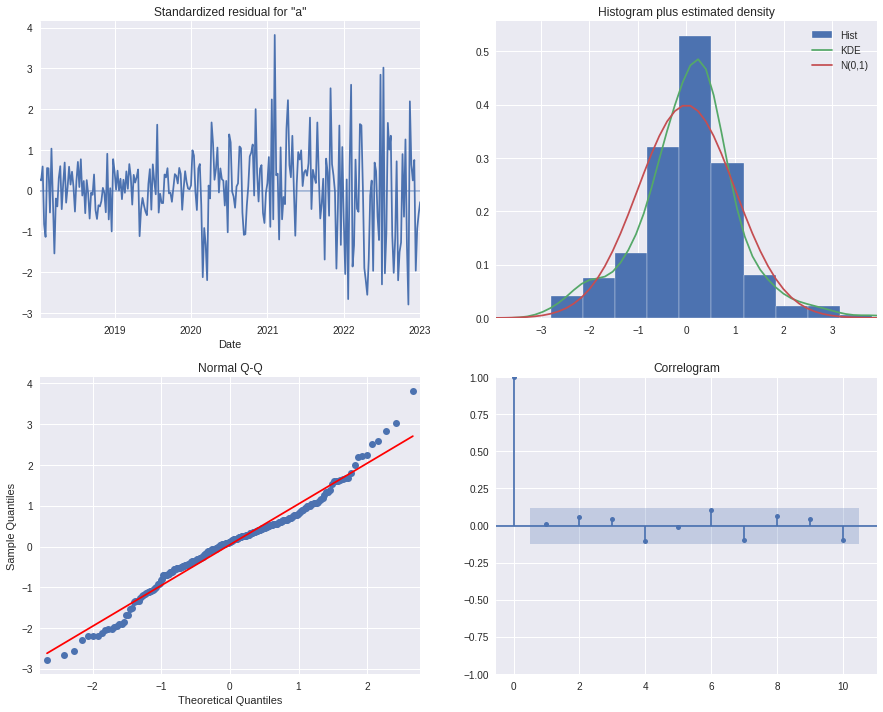

In [ ]:
#another way to plot the diagnoise, easiler than above
result.plot_diagnostics(figsize=(15, 12))

[Text(0.5, 1.0, "Ljung-Box test's results"),
 Text(0.5, 0, 'Lag'),
 Text(0, 0.5, 'p-value')]

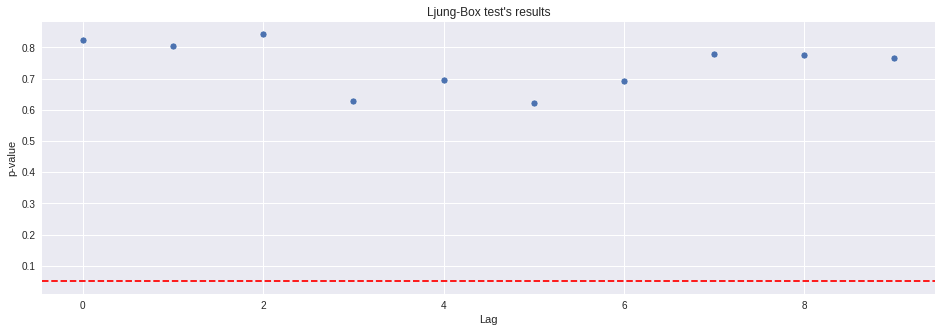

In [ ]:
#show the detail Ljung-box test for no autocorrelation in residuals and give a plot
#do the test
ljung_box_test = acorr_ljungbox(result.resid)
#the plot settings
fig, ax = plt.subplots(1, figsize=[16, 5])
sns.scatterplot(x=range(len(ljung_box_test['lb_pvalue'])), y=ljung_box_test['lb_pvalue'], ax=ax)
ax.axhline(0.05, ls='--', c='r')
ax.set(title="Ljung-Box test's results",xlabel='Lag',ylabel='p-value')

In [ ]:
ljung_box_test.head()

,lb_stat,lb_pvalue
1,0.048901,0.824988
2,0.434323,0.804800
3,0.831140,0.842005
4,2.589264,0.628726
5,3.028337,0.695617


- From the graph, since p-value of test statistics>significant level, we do not have enough evidence to reject $H_0$. As a result, it is a good model without significant correlation fit the time series data.

### Auto-ARIMA
- Automatically finds the best fitted model for our time series, with lowest AIC.

In [ ]:
!pip install pmdarima
import pmdarima as pm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 30.8 MB/s eta 0:00:00


In [ ]:
#build the model with default values without seasonality
AutoArima = pm.auto_arima(GOOG, error_action='ignore',suppress_warnings=True,seasonal=False)
AutoArima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  261
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -699.764
Date:                Sat, 04 Mar 2023   AIC                           1403.528
Time:                        05:47:38   BIC                           1410.649
Sample:                    01-07-2018   HQIC                          1406.391
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1393      0.049     -2.856      0.004      -0.235      -0.044
sigma2        12.7413      0.897     14.204      0.000      10.983      14.499
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                14.82
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               6.53   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- ARIMA(0,1,1), the SES model fits for the time series data as concequences.
- by default settings, Auto-ARIMA uses a stepwise algorithm to traverse the parameter space

In [ ]:
#fine-tuning
AutoArima = pm.auto_arima(GOOG,error_action='ignore',suppress_warnings=True,seasonal=False,
                          stepwise=False,approximation=False, #disable both stepwise and approxiation
                          n_jobs=-1) #set all cores for searching jobs
AutoArima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  261
Model:               SARIMAX(4, 1, 0)   Log Likelihood                -694.675
Date:                Sat, 04 Mar 2023   AIC                           1401.350
Time:                        05:49:51   BIC                           1422.714
Sample:                    01-07-2018   HQIC                          1409.939
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1571      0.220      0.713      0.476      -0.275       0.589
ar.L1         -0.1239      0.049     -2.520      0.012      -0.220      -0.028
ar.L2         -0.0131      0.050     -0.261      0.794      -0.111       0.085
ar.L3          0.1077      0.053      2.048      0.041       0.005       0.211
ar.L4         -0.1408      0.049     -2.881      0.004      -0.237      -0.045
sigma2        12.2458      0.890     13.765      0.000      10.502      13.989
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                13.68
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               6.50   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- As the table shown, ARIMA(4,1,0) is a better choice for fitting model.

## Forecasting using ARIMA Class Models
- In this case, we forecast the Google <u>first 2 months</u> stock prices in 2023. 

In [ ]:
#download the testing dataset for later comparison
test=yf.download('GOOG', start='2023-01-01',end='2023-03-04',progress=False)
test = test.resample('W').last().rename(columns={'Adj Close': 'adj_close'}).adj_close 

In [ ]:
test.head()

Date
2023-01-08     88.160004
2023-01-15     92.800003
2023-01-22     99.279999
2023-01-29    100.709999
2023-02-05    105.220001
Freq: W-SUN, Name: adj_close, dtype: float64

In [ ]:
test.tail()

Date
2023-02-05    105.220001
2023-02-12     94.860001
2023-02-19     94.589996
2023-02-26     89.349998
2023-03-05     94.019997
Freq: W-SUN, Name: adj_close, dtype: float64

In [ ]:
test=pd.DataFrame(test)

In [ ]:
#make the forecast with ARIMA(2,1,1) and store in a dataframe
n_forecasts = len(test)
arima_pred = result.get_forecast(steps=n_forecasts) 
arima_pred_ci=arima_pred.conf_int(alpha=0.05)
#forecast:get out-of sample forecasts;
#predict:In-sample predictions and out-of-sample forecasts.
#get_forecast: out-of sample forecasts and prediciton intervals

In [ ]:
arima_pred_ci

,lower adj_close,upper adj_close
2023-01-08,82.170097,96.079725
2023-01-15,79.842367,98.150044
2023-01-22,78.324963,99.736522
2023-01-29,76.731314,101.319484
2023-02-05,75.464012,102.583391
2023-02-12,74.240842,103.811115
2023-02-19,73.138308,104.910601
2023-02-26,72.097268,105.953287
2023-03-05,71.120215,106.929553


In [ ]:
#rename the columns name
arima_pred_ci=arima_pred_ci.rename(columns={'lower adj_close':'ci_lower'})

In [ ]:
arima_pred_ci=arima_pred_ci.rename(columns={'upper adj_close':'ci_upper'})

In [ ]:
arima_pred_ci

,ci_lower,ci_upper
2023-01-08,82.170097,96.079725
2023-01-15,79.842367,98.150044
2023-01-22,78.324963,99.736522
2023-01-29,76.731314,101.319484
2023-02-05,75.464012,102.583391
2023-02-12,74.240842,103.811115
2023-02-19,73.138308,104.910601
2023-02-26,72.097268,105.953287
2023-03-05,71.120215,106.929553


In [ ]:
#convert to dataframe
arima_prediction=pd.DataFrame(arima_pred.predicted_mean)

In [ ]:
#rename
arima_prediction=arima_prediction.rename(columns={'predicted_mean':'prediction'})

In [ ]:
arima_prediction

,prediction
2023-01-08,89.124911
2023-01-15,88.996205
2023-01-22,89.030743
2023-01-29,89.025399
2023-02-05,89.023702
2023-02-12,89.025979
2023-02-19,89.024455
2023-02-26,89.025278
2023-03-05,89.024884


In [ ]:
#make the prediction use auto-arima model
auto_arima_pred,confit = AutoArima.predict(steps=n_forecasts,index=test.index,return_conf_int=True,alpha=0.5)

In [ ]:
auto_arima_pred

2023-01-08    89.889240
2023-01-15    90.114925
2023-01-22    90.260404
2023-01-29    90.673446
2023-02-05    90.638521
2023-02-12    90.778406
2023-02-19    90.942608
2023-02-26    91.015582
2023-03-05    91.181449
2023-03-12    91.315006
Freq: W-SUN, dtype: float64

In [ ]:
#save CI into interval
CI=pd.DataFrame(confit)

In [ ]:
#rename
names=['ci_lower','ci_upper']
CI.columns=names

In [ ]:
CI

,ci_lower,ci_upper
0,87.528932,92.249548
1,86.976869,93.252981
2,86.499295,94.021512
3,86.248735,95.098157
4,85.809252,95.467789
5,85.542805,96.014006
6,85.322300,96.562915
7,85.063005,96.968160
8,84.890287,97.472611
9,84.708166,97.921846


In [ ]:
#change auto_arima_pred into dataframe
prediction= pd.DataFrame(auto_arima_pred,index=test.index)

In [ ]:
prediction

,prediction
Date,
2023-01-08,89.889240
2023-01-15,90.114925
2023-01-22,90.260404
2023-01-29,90.673446
2023-02-05,90.638521
2023-02-12,90.778406
2023-02-19,90.942608
2023-02-26,91.015582
2023-03-05,91.181449


In [ ]:
names=['prediction']
prediction.columns=names

In [ ]:
prediction

,prediction
Date,
2023-01-08,89.889240
2023-01-15,90.114925
2023-01-22,90.260404
2023-01-29,90.673446
2023-02-05,90.638521
2023-02-12,90.778406
2023-02-19,90.942608
2023-02-26,91.015582
2023-03-05,91.181449


In [ ]:
import seaborn as sns
plt.set_cmap('cubehelix')
sns.set_palette('cubehelix')
COLOR=[plt.cm.cubehelix(x) for x in [0.1, 0.3, 0.5, 0.7]] # color codes for red/green/blue/gray.

<Figure size 576x396 with 0 Axes>

In [ ]:
import matplotlib.dates as mdate

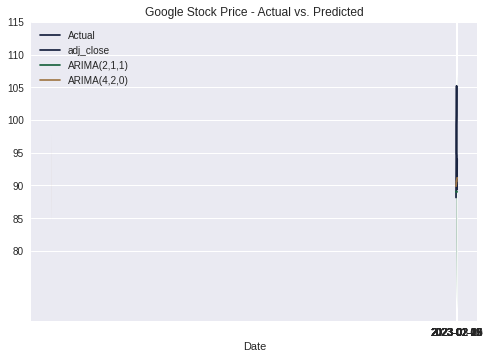

In [ ]:
ax = sns.lineplot(data=test, color=COLOR[0], label='Actual') #actual prices

ax.plot(arima_prediction.prediction, c=COLOR[1], label='ARIMA(2,1,1)')
ax.fill_between(arima_pred_ci.index,
                arima_pred_ci.ci_lower,
                arima_pred_ci.ci_upper,
                alpha=0.3, 
                facecolor=COLOR[1])

ax.plot(prediction.prediction, c=COLOR[2], label='ARIMA(4,2,0)')
ax.fill_between(CI.index,
                CI.ci_lower,
                CI.ci_upper,
                alpha=0.2, 
                facecolor=COLOR[2])

ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
plt.xticks(pd.date_range('2023-01-01','2023-03-05',freq='7d'))
plt.yticks(range(80, 120, 5)) 
ax.set(title="Google Stock Price - Actual vs. Predicted")
ax.legend(loc='upper left')